In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
data=pd.read_csv(f'{Path.cwd()}/../datasets/Intrusion.csv')
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,22,1,0,0,0,0,0,0,...,238,1.00,0.00,0.33,0.27,0.0,0.0,1.0,1.0,11
1,0,1,22,9,220,10091,0,0,0,0,...,255,1.00,0.00,0.07,0.03,0.0,0.0,0.0,0.0,11
2,0,1,22,9,224,284,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11
3,0,1,45,5,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,9
4,0,1,45,1,0,0,0,0,0,0,...,18,0.07,0.06,0.00,0.00,0.0,0.0,1.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50476,0,1,22,9,228,279,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.0,0.0,0.0,0.0,11
50477,0,1,22,9,285,174,0,0,0,0,...,23,1.00,0.00,0.04,0.00,0.0,0.0,0.0,0.0,11
50478,0,1,22,9,169,36271,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11
50479,0,2,45,9,28,0,0,2,0,0,...,95,0.37,0.01,0.37,0.00,0.0,0.0,0.0,0.0,17


In [4]:
raw_df_features = data.drop(columns=['class'])
raw_df_labels = data[['class']]
raw_df_features, raw_df_labels

(       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
 0             0              1       22     1          0          0     0   
 1             0              1       22     9        220      10091     0   
 2             0              1       22     9        224        284     0   
 3             0              1       45     5          0          0     0   
 4             0              1       45     1          0          0     0   
 ...         ...            ...      ...   ...        ...        ...   ...   
 50476         0              1       22     9        228        279     0   
 50477         0              1       22     9        285        174     0   
 50478         0              1       22     9        169      36271     0   
 50479         0              2       45     9         28          0     0   
 50480         0              1       22     9        190       2325     0   
 
        wrong_fragment  urgent  hot  ...  dst_host_count  dst_

In [5]:
# apply stratified sampling to the dataset to lower the number of rows to n samples
X_train, X_test, y_train, y_test = train_test_split(
    raw_df_features,
    raw_df_labels,
    test_size=50000,
    random_state=42, 
    stratify=raw_df_labels.to_numpy()
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((481, 41), (50000, 41), (481, 1), (50000, 1))

In [6]:
categorical_columns = []
binary_columns = []
numerical_columns = []
constant_columns = []

for i in X_test.columns:
    if data[i].nunique() > 2 and data[i].nunique() <= 20:
        categorical_columns.append(i)
        print(f"Cat col: {i}, {data[i].nunique()}")
    elif data[i].nunique() == 2:
        binary_columns.append(i)
        print(f"Binary col: {i}, {data[i].nunique()}")
    elif data[i].nunique() == 1:
        constant_columns.append(i)
        print(f"Constant col: {i}, {data[i].nunique()}")
    else:
        numerical_columns.append(i)
        print(f"numerical col: {i}, {data[i].nunique()}")

numerical col: duration, 1171
Cat col: protocol_type, 3
numerical col: service, 65
Cat col: flag, 11
numerical col: src_bytes, 2413
numerical col: dst_bytes, 6977
Binary col: land, 2
Cat col: wrong_fragment, 3
Constant col: urgent, 1
Cat col: hot, 18
Cat col: num_failed_logins, 3
Binary col: logged_in, 2
Cat col: num_compromised, 13
Binary col: root_shell, 2
Cat col: su_attempted, 3
Cat col: num_root, 13
Cat col: num_file_creations, 7
Cat col: num_shells, 3
Cat col: num_access_files, 6
Constant col: num_outbound_cmds, 1
Constant col: is_host_login, 1
Binary col: is_guest_login, 2
numerical col: count, 385
numerical col: srv_count, 318
numerical col: serror_rate, 77
numerical col: srv_serror_rate, 42
numerical col: rerror_rate, 66
numerical col: srv_rerror_rate, 36
numerical col: same_srv_rate, 94
numerical col: diff_srv_rate, 66
numerical col: srv_diff_host_rate, 59
numerical col: dst_host_count, 255
numerical col: dst_host_srv_count, 255
numerical col: dst_host_same_srv_rate, 101
nume

In [ ]:
X_test.info()

**Dealing with empty values**

In [ ]:
data.isnull().sum().sum()

All the empty values have been filled with the mean. The next step is to check for any duplicates and removing them.

**Dealing with duplicates**

In [ ]:
data.duplicated().sum()
# data.drop_duplicates()

### Make it binary classification by having normal cases (11) mapped to 0 and attack cases (all the other cases) to 1

In [7]:
y_test['class'].loc[y_test['class']!=11] = 12
y_test['class'].value_counts()

11    33912
12    16088
Name: class, dtype: int64

In [8]:
le = LabelEncoder()
y_test['class'] = le.fit_transform(y_test['class'])
y_test['class'].value_counts()

0    33912
1    16088
Name: class, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# standard scale numerical columns
for col in numerical_columns:
    _scaler = StandardScaler()
    X_test[col] = _scaler.fit_transform(X_test[col].to_numpy().reshape(-1, 1))

In [10]:
for col in X_test.columns.tolist():
    if col in binary_columns:
        _encoder = LabelEncoder()
        _encoder.fit(X_test[col])

        # Some logging
        print(f"Number Unique Classes of LabelEncoding in column {col}: {len(np.unique(_encoder.classes_))}")
        
        X_test[col] = _encoder.fit_transform(X_test[col])

Number Unique Classes of LabelEncoding in column land: 2
Number Unique Classes of LabelEncoding in column logged_in: 2
Number Unique Classes of LabelEncoding in column root_shell: 2
Number Unique Classes of LabelEncoding in column is_guest_login: 2


In [11]:
X_test_one_hot = pd.get_dummies(X_test, columns=categorical_columns, prefix_sep="__")

In [12]:
merged_df = pd.concat([X_test_one_hot, y_test], axis=1)
merged_df.isna().sum().sum()

0

In [13]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,50000.0,-3.367973e-17,1.000010,-0.108455,-0.108455,-0.108455,-0.108455,32.943425
service,50000.0,-1.022471e-16,1.000010,-2.383215,-0.664242,-0.664242,1.132866,2.617433
src_bytes,50000.0,2.486900e-19,1.000010,-0.005582,-0.005582,-0.005516,-0.005486,223.464004
dst_bytes,50000.0,-6.252776e-18,1.000010,-0.048026,-0.048026,-0.043610,-0.026528,75.592367
land,50000.0,1.400000e-04,0.011831,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
num_access_files__2,50000.0,3.000000e-04,0.017318,0.000000,0.000000,0.000000,0.000000,1.000000
num_access_files__3,50000.0,2.000000e-05,0.004472,0.000000,0.000000,0.000000,0.000000,1.000000
num_access_files__4,50000.0,2.000000e-05,0.004472,0.000000,0.000000,0.000000,0.000000,1.000000
num_access_files__5,50000.0,2.000000e-05,0.004472,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
for col in merged_df.columns:
    print(f"- \"{col}\"")

In [14]:
merged_df.to_csv(f'{Path.cwd()}/../datasets/Intrusion_preprocessed.csv', index=False)

Confusion Matrix


<AxesSubplot: >

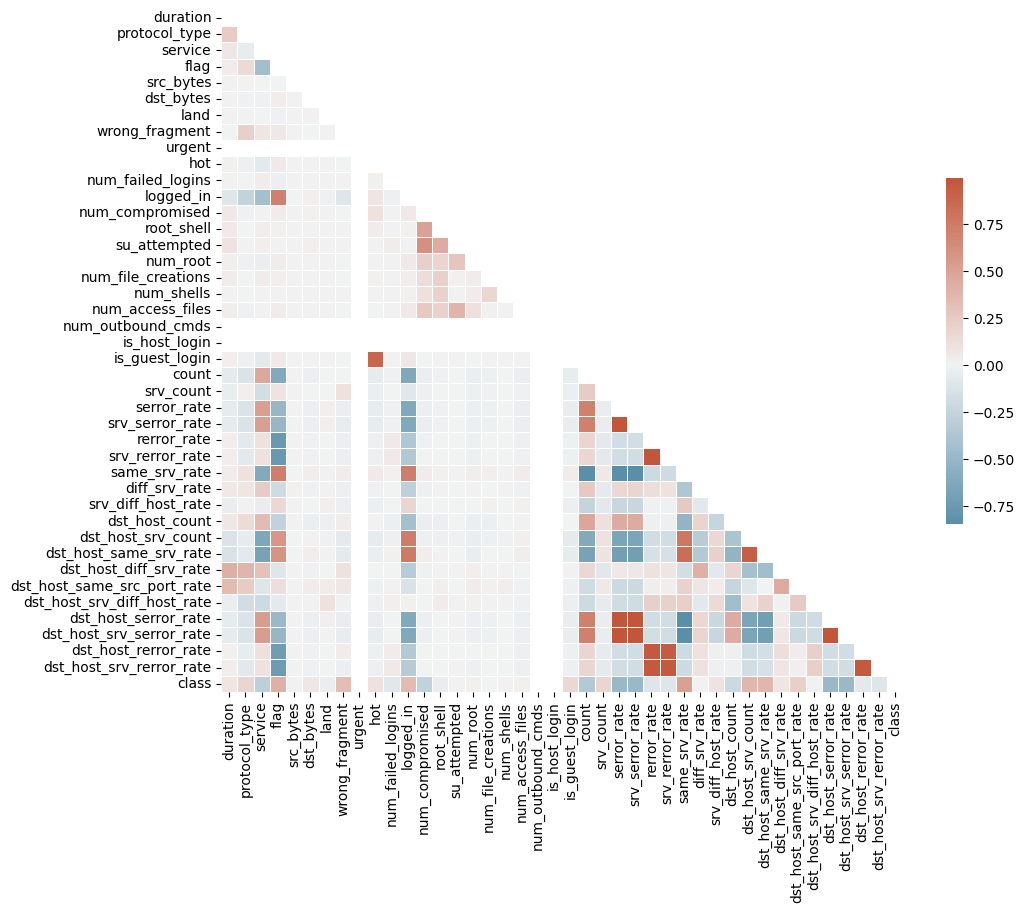

In [3]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})